# 1. Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
print("There is {} rows and {} columns in the train dataframe".format(df_train.shape[0], df_train.shape[1]))
print("There is {} rows and {} columns in the test dataframe".format(df_test.shape[0], df_test.shape[1]))

There is 891 rows and 12 columns in the train dataframe
There is 418 rows and 11 columns in the test dataframe


# 2. Preprocessing & feature engineering

In [6]:
import matplotlib.pyplot as plt
import scipy
from statsmodels.graphics.gofplots import qqplot

In [7]:
def test_normality(data, bins):
    
    _, p_value_shapiro = scipy.stats.shapiro(data)
    _, p_value_normaltest = scipy.stats.normaltest(data)
    _, p_value_kstest = scipy.stats.kstest(data, 'norm')
    result_anderson = scipy.stats.anderson(data)
    
    print("Shapiro: {}".format(p_value_shapiro))
    print("Normal test: {}".format(p_value_normaltest))
    print("Kstest: {}".format(p_value_kstest))
    print("Anderson: {}".format(result_anderson))
    
    plt.hist(data, bins=bins)
    qqplot(data, line='s')
    plt.show()

## 2.1. Passenger id

Passenger id is nothing more than the id in the dataframe, it does not bring any information, we can drop it

In [8]:
df_train.drop(labels=["PassengerId"], axis=1, inplace=True)

## 2.2. Pclass

P class is the ticket class, which can be see as a proxy for socio-economic status

In [9]:
df_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [10]:
df_test.Pclass.unique()

array([3, 2, 1], dtype=int64)

There is 3 differents categories, let get dummies from

In [11]:
df_train = pd.get_dummies(data=df_train, columns=["Pclass"], drop_first=False)
df_test = pd.get_dummies(data=df_test, columns=["Pclass"], drop_first=False)

## 2.3. Name

For the moment, we will drop Name and see after if NLP can help us to extract another features

In [12]:
df_train.drop(labels=["Name"], axis=1, inplace=True)
df_test.drop(labels=["Name"], axis=1, inplace=True)

## 2.4. Sex

In [13]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
df_test.Sex.unique()

array(['male', 'female'], dtype=object)

There is 2 differents categories, let get dummies from

In [15]:
df_train = pd.get_dummies(data=df_train, columns=["Sex"], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=["Sex"], drop_first=True)

## 2.5. Age

Age is integer based. For children less than one years old, Age is fractionnal. If the Age is estimated, Age is in the format xx.5

In [16]:
df_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
df_test.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

First, let's see nan

In [18]:
print("There is {} rows without age in the train dataframe".format(df_train.Age.isna().sum()))
print("There is {} rows without age in the test dataframe".format(df_test.Age.isna().sum()))

There is 177 rows without age in the train dataframe
There is 86 rows without age in the test dataframe


Second, let's see the number of passenger with estimated age

In [19]:
print("There is {} rows with estimated age in the train dataframe".format(df_train[df_train.Age.notna()].Age.apply(lambda x: (x - int(x)) == 0.5).sum()))
print("There is {} rows with estimated age in the test dataframe".format(df_test[df_test.Age.notna()].Age.apply(lambda x: (x - int(x)) == 0.5).sum()))

There is 18 rows with estimated age in the train dataframe
There is 15 rows with estimated age in the test dataframe


For the moment, we will estimated missing value by the mean of the value which are present in the dataframe

In [20]:
mean_age = df_train[
    (df_train.Age.notna()) & 
    (df_train[df_train.Age.notna()].Age.apply(lambda x: (x - int(x)) != 0.5))
].Age.mean()

df_train.Age = df_train.Age.fillna(mean_age)
df_test.Age = df_test.Age.fillna(mean_age)

Let's see if age is Gaussian

Shapiro: 3.3682851717883227e-15
Normal test: 1.9732930746087148e-10
Kstest: 0.0
Anderson: AndersonResult(statistic=15.460820154545672, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


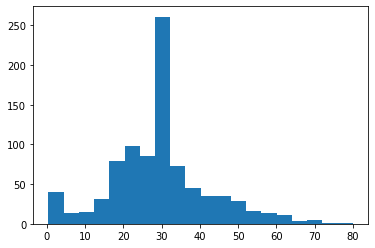

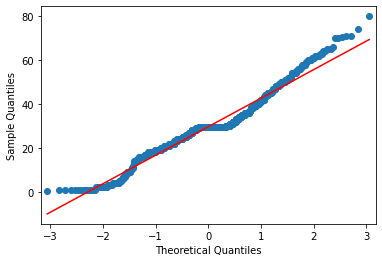

In [21]:
test_normality(data=df_train.Age, bins=20)

Shapiro: 2.8109001806936665e-14
Normal test: 0.00029516003478597557
Kstest: 0.0
Anderson: AndersonResult(statistic=14.713819163754351, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


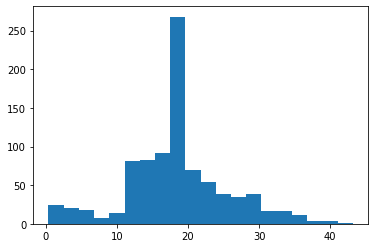

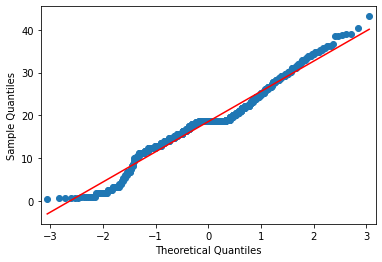

In [22]:
from scipy.stats import yeojohnson

Age = df_train.Age
Age, _ = yeojohnson(Age)
test_normality(Age, bins=20)

Shapiro: 2.470032269268497e-14
Normal test: 0.00027368684886368847
Kstest: 0.0
Anderson: AndersonResult(statistic=14.818679166332231, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


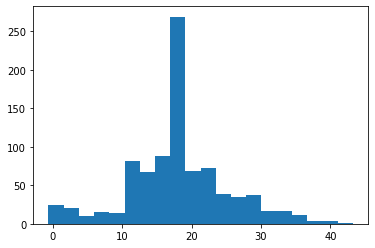

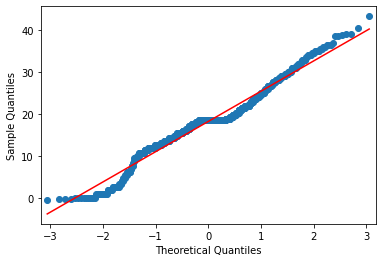

In [23]:
from scipy.stats import boxcox

Age = df_train.Age
Age, _ = boxcox(Age)
test_normality(data=Age, bins=20)

Shapiro: 8.793059943347558e-33
Normal test: 9.798185984126646e-94
Kstest: 0.0
Anderson: AndersonResult(statistic=54.22371756134146, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


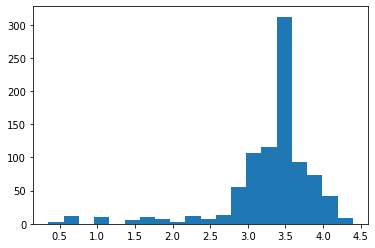

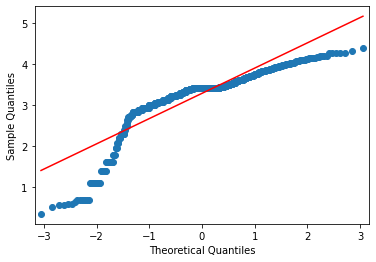

In [24]:
Age = df_train.Age.apply(lambda age: np.log(age+1))
test_normality(data=Age, bins=20)

Shapiro: 3.063845646506017e-20
Normal test: 4.272014597898145e-27
Kstest: 0.0
Anderson: AndersonResult(statistic=21.790806916044176, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


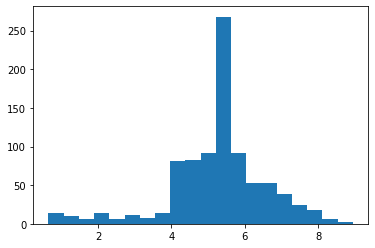

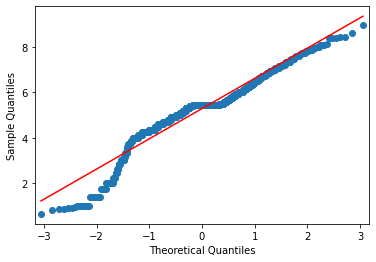

In [25]:
Age = df_train.Age.apply(lambda age: np.sqrt(age))
test_normality(data=Age, bins=20)

We will use yeojohnson transformation to make Age Gaussian-like

In [26]:
Age = df_train.Age
Age, lmbda = yeojohnson(Age)
mean_age = np.mean(Age)
std_age = np.std(Age)
df_train.Age = (Age - mean_age) / std_age

In [27]:
Age = df_test.Age
Age = yeojohnson(Age, lmbda=lmbda)
df_test.Age = (Age - mean_age) / std_age

## 2.6. SibSp

In [28]:
sorted(df_train.SibSp.unique())

[0, 1, 2, 3, 4, 5, 8]

In [29]:
sorted(df_test.SibSp.unique())

[0, 1, 2, 3, 4, 5, 8]

Let's create other features from SibSp

In [30]:
df_train = df_train.merge(
    pd.get_dummies(df_train[["SibSp"]], columns=["SibSp"]),
    left_index=True,
    right_index=True
)
df_test = df_test.merge(
    pd.get_dummies(df_test[["SibSp"]], columns=["SibSp"]),
    left_index=True,
    right_index=True
)

In [31]:
for nb_SibSp in [1, 2, 3, 4, 5, 8]:
    df_train["Has_at_least_" + str(nb_SibSp) + "_SibSp_onboard"] = df_train.SibSp.apply(lambda SibSp: 1 if SibSp >= nb_SibSp else 0)
    df_test["Has_at_least_" + str(nb_SibSp) + "_SibSp_onboard"] = df_test.SibSp.apply(lambda SibSp: 1 if SibSp >= nb_SibSp else 0)

Let's check if SibSp is Gaussian

Shapiro: 5.74532370373175e-44
Normal test: 1.0712617667710052e-157
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=147.36454099049797, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


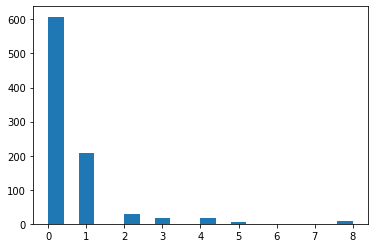

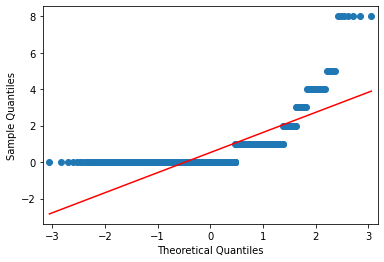

In [32]:
test_normality(data=df_train.SibSp, bins=20)

Shapiro: 1.5790812004937066e-40
Normal test: 0.0
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=176.9843715644688, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


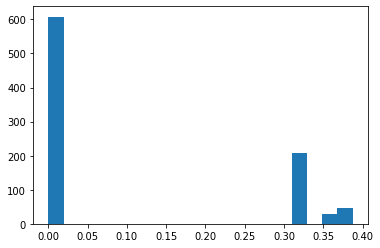

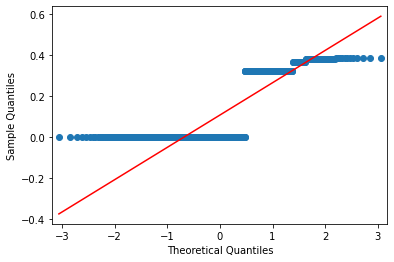

In [33]:
from scipy.stats import yeojohnson

SibSp = df_train.SibSp
SibSp, _ = yeojohnson(SibSp)
test_normality(SibSp, bins=20)

Shapiro: 2.1474898965777822e-41
Normal test: 0.0
Kstest: 0.0
Anderson: AndersonResult(statistic=186.72833958038177, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


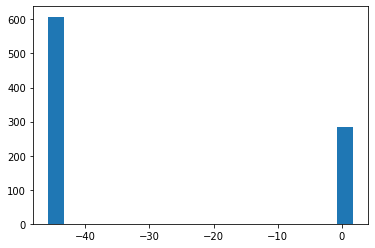

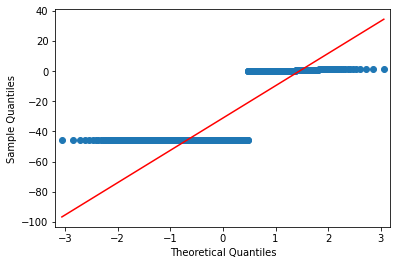

In [34]:
from scipy.stats import boxcox

SibSp = df_train.SibSp.apply(lambda SibSp: SibSp + 1e-5)
SibSp, _ = boxcox(SibSp)
test_normality(data=SibSp, bins=20)

Shapiro: 2.0448153567982385e-39
Normal test: 1.215569971058545e-59
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=141.20045398623438, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


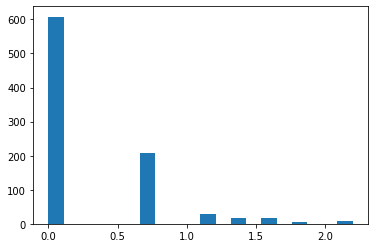

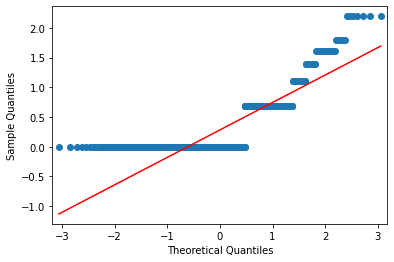

In [35]:
SibSp = df_train.SibSp.apply(lambda SibSp: np.log(SibSp+1))
test_normality(data=SibSp, bins=20)

Shapiro: 4.4636793126787004e-39
Normal test: 2.1897734858361868e-46
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=145.25871698526862, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


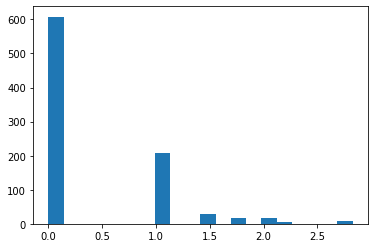

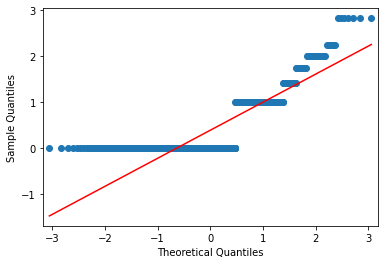

In [36]:
SibSp = df_train.SibSp.apply(lambda SibSp: np.sqrt(SibSp))
test_normality(data=SibSp, bins=20)

In [37]:
SibSp = df_train.SibSp.apply(lambda SibSp: np.sqrt(SibSp))
mean_sibsp = SibSp.mean()
std_sibsp = SibSp.std()
df_train.SibSp = SibSp.apply(lambda sibsp: (sibsp - mean_sibsp) / std_sibsp)

In [38]:
SibSp = df_test.SibSp.apply(lambda SibSp: np.sqrt(SibSp))
df_test.SibSp = SibSp.apply(lambda sibsp: (sibsp - mean_sibsp) / std_sibsp)

## 2.7. Parch

Parch is the number of parents / children aboard the Titanic

In [39]:
sorted(df_train.Parch.unique())

[0, 1, 2, 3, 4, 5, 6]

In [40]:
sorted(df_test.Parch.unique())

[0, 1, 2, 3, 4, 5, 6, 9]

In [41]:
df_train = df_train.merge(
    pd.get_dummies(df_train[["Parch"]], columns=["Parch"]),
    left_index=True,
    right_index=True
)
df_test = df_test.merge(
    pd.get_dummies(df_test[["Parch"]], columns=["Parch"]),
    left_index=True,
    right_index=True
)

In [42]:
for nb_Parch in [1, 2, 3, 4, 5, 6]:
    df_train["Has_at_least_" + str(nb_Parch) + "_Parch_onboard"] = df_train.Parch.apply(lambda Parch: 1 if Parch >= Parch else 0)
    df_test["Has_at_least_" + str(nb_Parch) + "_Parch_onboard"] = df_test.Parch.apply(lambda Parch: 1 if Parch >= Parch else 0)

Let's check if Parch is Gaussian

Shapiro: 2.382207389352189e-43
Normal test: 1.2061095353353198e-118
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=175.6588310792729, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


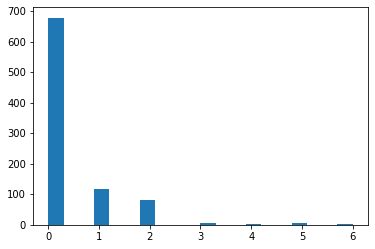

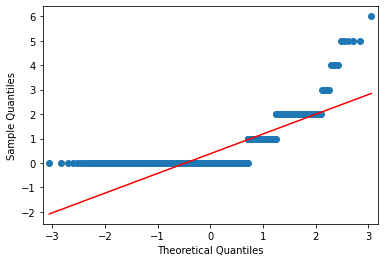

In [43]:
test_normality(data=df_train.Parch, bins=20)

Shapiro: 3.2369994525903274e-43
Normal test: 1.509390655911863e-35
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=215.03778525684083, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


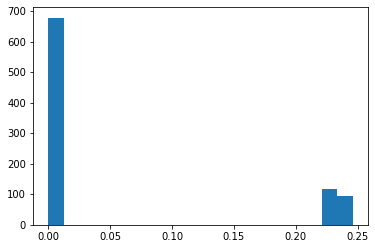

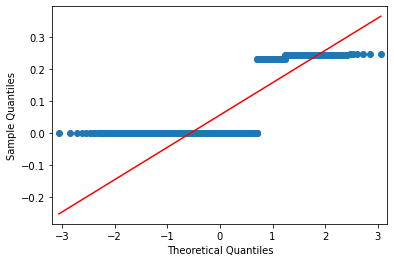

In [44]:
from scipy.stats import yeojohnson

Parch = df_train.Parch
Parch, _ = yeojohnson(Parch)
test_normality(Parch, bins=20)

Shapiro: 1.9337918807682476e-43
Normal test: 1.121935625849383e-35
Kstest: 0.0
Anderson: AndersonResult(statistic=218.0976883796145, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


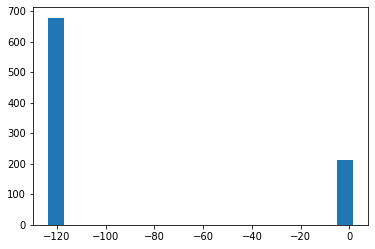

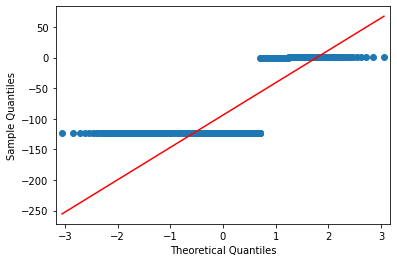

In [45]:
from scipy.stats import boxcox

Parch = df_train.Parch.apply(lambda Parch: Parch + 1e-5)
Parch, _ = boxcox(Parch)
test_normality(data=Parch, bins=20)

Shapiro: 6.16991713842217e-42
Normal test: 4.427277155229021e-56
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=186.58838641468083, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


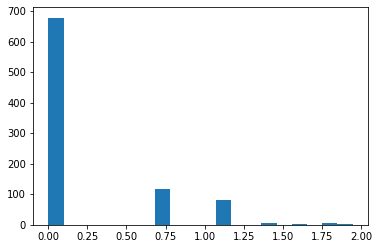

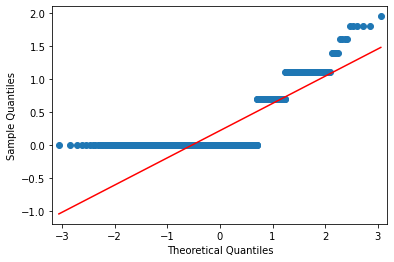

In [46]:
Parch = df_train.Parch.apply(lambda Parch: np.log(Parch+1))
test_normality(data=Parch, bins=20)

Shapiro: 6.654766407078556e-42
Normal test: 6.498141095141998e-47
Kstest: 1.6792880627181903e-206
Anderson: AndersonResult(statistic=191.1532109609118, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


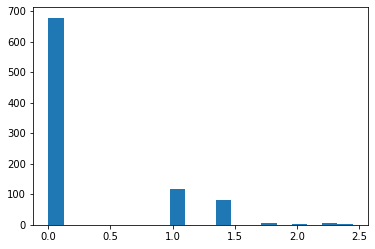

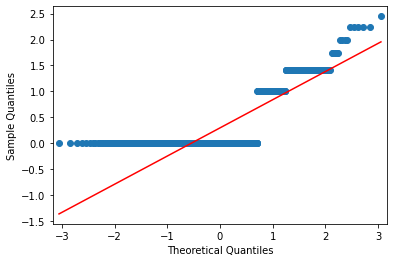

In [47]:
Parch = df_train.Parch.apply(lambda Parch: np.sqrt(Parch))
test_normality(data=Parch, bins=20)

In [48]:
Parch = df_train.Parch
Parch, lmbda = yeojohnson(Parch)
mean_parch = np.mean(Parch)
std_parch = np.std(Parch)
df_train.Parch = (Parch - mean_parch) / std_parch

In [49]:
Parch = df_test.Parch
Parch = yeojohnson(Parch, lmbda=lmbda)
df_test.Parch = (Parch - mean_parch) / std_parch

## 2.8. Ticket

Ticket represent the ticket number

In [50]:
df_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Ticket does not seem to bring information so let's drop it

In [51]:
df_train.drop(labels=["Ticket"], axis=1, inplace=True)
df_test.drop(labels=["Ticket"], axis=1, inplace=True)

## 2.9. Fare

Fare report the fare of the ticket

In [52]:
df_train.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [53]:
df_test.Fare = df_test.Fare.fillna(0.0)

Shapiro: 1.0789998175301091e-43
Normal test: 3.727091062842147e-197
Kstest: 0.0
Anderson: AndersonResult(statistic=122.16962721459208, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


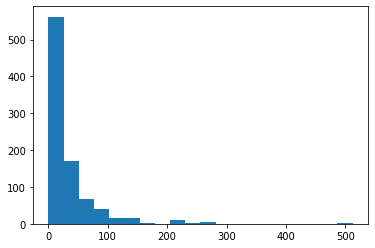

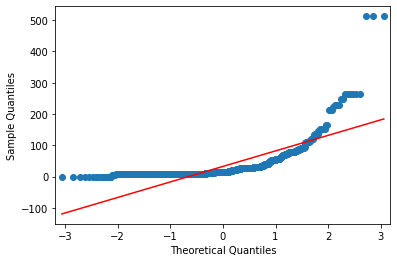

In [54]:
test_normality(data=df_train.Fare, bins=20)

Shapiro: 2.744576588670101e-22
Normal test: 8.147507760164453e-08
Kstest: 0.0
Anderson: AndersonResult(statistic=23.15878870212498, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


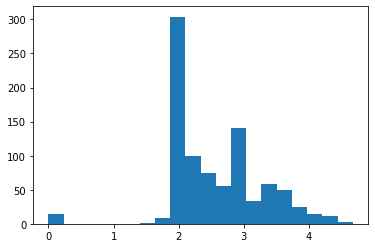

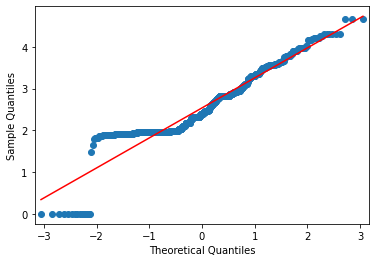

In [55]:
from scipy.stats import yeojohnson

Fare = df_train.Fare
Fare, _ = yeojohnson(Fare)
test_normality(Fare, bins=20)

Shapiro: 1.652677925356806e-26
Normal test: 1.5273085483941805e-19
Kstest: 0.0
Anderson: AndersonResult(statistic=35.545645342163425, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


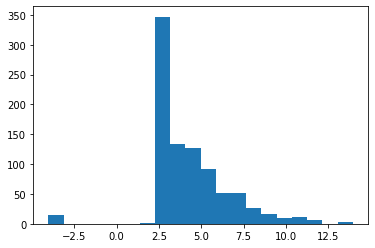

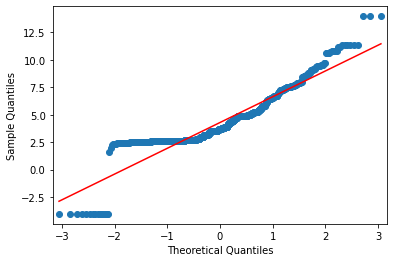

In [56]:
from scipy.stats import boxcox

Fare = df_train.Fare.apply(lambda fare: fare + 1e-5)
Fare, _ = boxcox(Fare)
test_normality(data=Fare, bins=20)

Shapiro: 6.642045243763613e-22
Normal test: 2.206246111056749e-09
Kstest: 0.0
Anderson: AndersonResult(statistic=26.16684640028302, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


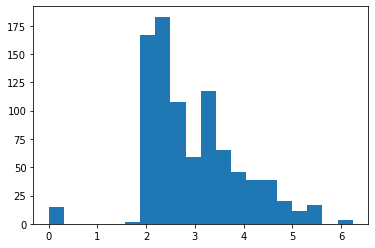

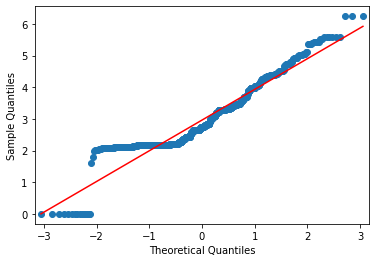

In [57]:
Fare = df_train.Fare.apply(lambda Fare: np.log(Fare+1))
test_normality(data=Fare, bins=20)

Shapiro: 1.7473432590121475e-32
Normal test: 5.506750739166405e-89
Kstest: 0.0
Anderson: AndersonResult(statistic=56.62090227289309, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


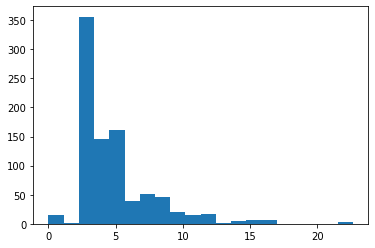

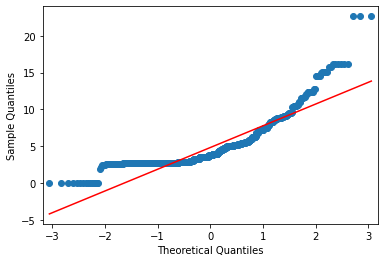

In [58]:
Fare = df_train.Fare.apply(lambda Fare: np.sqrt(Fare))
test_normality(data=Fare, bins=20)

In [59]:
Fare = df_train.Fare
Fare, lmbda = yeojohnson(Fare)
mean_fare = np.mean(Fare)
std_fare = np.std(Fare)
df_train.Fare = (Fare - mean_fare) / std_fare

In [60]:
Fare = df_test.Fare
Fare = yeojohnson(Fare, lmbda=lmbda)
df_test.Fare = (Fare - mean_fare) / std_fare

## 2.10. Cabin

Cabin represent the Cabin number

In [61]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
df_train.Cabin.isna().mean()

0.7710437710437711

In [63]:
df_test.Cabin.isna().mean()

0.7822966507177034

In [64]:
df_train["Has_a_cabin"] = df_train.Cabin.notna()
df_test["Has_a_cabin"] = df_test.Cabin.notna()

In [65]:
df_train.drop(labels=["Cabin"], axis=1, inplace=True)
df_test.drop(labels=["Cabin"], axis=1, inplace=True)

## 2.11. Embarked

Embarked is the port of embarkation

In [66]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
df_test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [68]:
df_train.Embarked.isna().sum()

2

In [69]:
df_test.Embarked.isna().sum()

0

In [70]:
df_train = pd.get_dummies(df_train, columns=["Embarked"], dummy_na=False)
df_test = pd.get_dummies(df_test, columns=["Embarked"], dummy_na=False)

# 3. Model with basics features

In [71]:
X_train = df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Sex_male', 'Has_a_cabin', 
                    'Embarked_C', 'Embarked_Q', 'Embarked_S']]
X_test = df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Sex_male', 'Has_a_cabin', 
                    'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y_train = df_train[['Survived']].to_numpy().ravel()

## 3.1. Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=1000, random_state=42)

parameters = [
    {
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"],
        "C": list(np.logspace(-5, 5, 31))
    },
    {
        "solver": ["saga"],
        "penalty": ["elasticnet"],
        "C": list(np.logspace(-5, 5, 31)),
        "l1_ratio": list(np.linspace(0.1, 0.9, 9)),
        "n_jobs": [-1]
    }
]

clf = GridSearchCV(estimator=logistic, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [73]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/Logistic_basic_features.csv', index=False)

Fitting 10 folds for each of 341 candidates, totalling 3410 fits
Best score 0.8024469413233459
Best params: {'C': 0.21544346900318823, 'penalty': 'l2', 'solver': 'liblinear'}


## 3.2. KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kNN = KNeighborsClassifier(n_jobs=-1)

parameters = {
    "n_neighbors": list(np.linspace(1, 800, 800, dtype=np.int16)),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

clf = GridSearchCV(estimator=kNN, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [97]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/KNN_basic_features.csv', index=False)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best score 0.8159675405742821
Best params: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


## 3.3. SVM

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)

parameters = [
    {
        "C": list(np.logspace(-3, 3, 7)), #list(np.logspace(-5, 5, 31)),
        "kernel": ["linear", "rbf", "sigmoid"]
    },
    {
        "C":  list(np.logspace(-3, 3, 7)), #list(np.logspace(-5, 5, 31)),
        "kernel": ["poly"],
        "degree": list(np.linspace(1, 10, 10))
    }
]
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [75]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/SVM_basic_features.csv', index=False)

Fitting 10 folds for each of 91 candidates, totalling 910 fits
Best score 0.8204494382022472
Best params: {'C': 1.0, 'kernel': 'rbf'}


## 3.4. Gradien boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

xgboost = GradientBoostingClassifier(random_state=42)

parameters = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.3, 0.6, 0.9],
    "n_estimators": [1e1, 1e2, 1e3, 1e4, 1e5, 1e6],
    "subsample": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "min_samples_split": [2, 5, 10, 20, 50, 100],
    "min_samples_leaf": [1, 2, 5, 10, 20, 50, 100],
    "min_weight_fraction_leaf": [0, 0.2, 0.4, 0.5],
    "max_depth": [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
}

clf = GridSearchCV(estimator=xgboost, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

xgboost = GradientBoostingClassifier(random_state=42)

parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [10, 20, 50, 100, 200, 500, 1000],
    "subsample": list(np.linspace(0.1, 1.0, 10))
}

clf = GridSearchCV(estimator=xgboost, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [89]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/XGBoost_basic_features.csv', index=False)

Fitting 10 folds for each of 350 candidates, totalling 3500 fits
Best score 0.8372908863920099
Best params: {'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.7000000000000001}


# 4. Model with full features

In [81]:
X_train = df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Has_at_least_1_SibSp_onboard',
       'Has_at_least_2_SibSp_onboard', 'Has_at_least_3_SibSp_onboard',
       'Has_at_least_4_SibSp_onboard', 'Has_at_least_5_SibSp_onboard',
       'Has_at_least_8_SibSp_onboard', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Has_at_least_1_Parch_onboard', 'Has_at_least_2_Parch_onboard',
       'Has_at_least_3_Parch_onboard', 'Has_at_least_4_Parch_onboard',
       'Has_at_least_5_Parch_onboard', 'Has_at_least_6_Parch_onboard',
       'Has_a_cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
X_test = df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Has_at_least_1_SibSp_onboard',
       'Has_at_least_2_SibSp_onboard', 'Has_at_least_3_SibSp_onboard',
       'Has_at_least_4_SibSp_onboard', 'Has_at_least_5_SibSp_onboard',
       'Has_at_least_8_SibSp_onboard', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Has_at_least_1_Parch_onboard', 'Has_at_least_2_Parch_onboard',
       'Has_at_least_3_Parch_onboard', 'Has_at_least_4_Parch_onboard',
       'Has_at_least_5_Parch_onboard', 'Has_at_least_6_Parch_onboard',
       'Has_a_cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y_train = df_train[['Survived']].to_numpy().ravel()

## 4.1. Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=1000, random_state=42)

parameters = [
    {
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"],
        "C": list(np.logspace(-5, 5, 31))
    },
    {
        "solver": ["saga"],
        "penalty": ["elasticnet"],
        "C": list(np.logspace(-5, 5, 31)),
        "l1_ratio": list(np.linspace(0.1, 0.9, 9)),
        "n_jobs": [-1]
    }
]

clf = GridSearchCV(estimator=logistic, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [76]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/Logistic_full_features.csv', index=False)

Fitting 10 folds for each of 341 candidates, totalling 3410 fits
Best score 0.8159300873907614
Best params: {'C': 2.154434690031882, 'penalty': 'l2', 'solver': 'liblinear'}


## 4.2. KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kNN = KNeighborsClassifier(n_jobs=-1)

parameters = {
    "n_neighbors": list(np.linspace(1, 800, 800, dtype=np.int16)),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

clf = GridSearchCV(estimator=kNN, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [102]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/KNN_full_features.csv', index=False)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best score 0.798039950062422
Best params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


## 4.3. SVM

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)

parameters = [
    {
        "C": list(np.logspace(-3, 3, 7)), #list(np.logspace(-5, 5, 31)),
        "kernel": ["linear", "rbf", "sigmoid"]
    },
    {
        "C":  list(np.logspace(-3, 3, 7)), #list(np.logspace(-5, 5, 31)),
        "kernel": ["poly"],
        "degree": list(np.linspace(1, 10, 10))
    }
]
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', n_jobs=-1, refit=True, cv=10, verbose=4)

In [83]:
clf = clf.fit(X_train, y_train)
print("Best score {}".format(clf.best_score_))
print("Best params: " + str(clf.best_params_))
y_pred = clf.predict(X_test)
pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred}).to_csv('./results/SVM_full_features.csv', index=False)

Fitting 10 folds for each of 91 candidates, totalling 910 fits
Best score 0.8271785268414481
Best params: {'C': 1.0, 'kernel': 'rbf'}
